### Taking the order features part of the WALS data, we check what PCA and MCS show us with R

In [1]:
datraw <- read.csv("order-features-matrix.csv")
summary(datraw)

       X         word_order3          issov             isvso        
 aab    :   1   Min.   :-1.0000   Min.   :-1.0000   Min.   :-1.0000  
 abi    :   1   1st Qu.: 1.0000   1st Qu.:-1.0000   1st Qu.:-1.0000  
 abk    :   1   Median : 1.0000   Median :-1.0000   Median :-1.0000  
 abn    :   1   Mean   : 0.8661   Mean   :-0.1932   Mean   :-0.8492  
 abo    :   1   3rd Qu.: 1.0000   3rd Qu.: 1.0000   3rd Qu.:-1.0000  
 abu    :   1   Max.   : 1.0000   Max.   : 1.0000   Max.   : 1.0000  
 (Other):1174                                                        
  word_order2       word_order1          isovs          adj_noun_adj    
 Min.   :-1.0000   Min.   :-1.0000   Min.   :-1.0000   Min.   :-1.0000  
 1st Qu.: 1.0000   1st Qu.: 1.0000   1st Qu.:-1.0000   1st Qu.:-1.0000  
 Median : 1.0000   Median : 1.0000   Median :-1.0000   Median :-1.0000  
 Mean   : 0.8525   Mean   : 0.7475   Mean   :-0.9644   Mean   :-0.8661  
 3rd Qu.: 1.0000   3rd Qu.: 1.0000   3rd Qu.:-1.0000   3rd Qu.:-1.0000  
 M

In [2]:
dat <- datraw[2:dim(datraw)[2]]
pca <- prcomp(dat,center = TRUE,scale. = TRUE)
summary(pca)

Importance of components:
                         PC1    PC2    PC3    PC4    PC5    PC6     PC7     PC8
Standard deviation     1.759 1.5480 1.4491 1.3428 1.2770 1.1355 1.00222 0.69232
Proportion of Variance 0.221 0.1712 0.1500 0.1288 0.1165 0.0921 0.07175 0.03424
Cumulative Proportion  0.221 0.3922 0.5422 0.6710 0.7874 0.8795 0.95129 0.98552
                           PC9    PC10    PC11      PC12      PC13      PC14
Standard deviation     0.42891 0.09818 0.09530 9.575e-15 5.139e-15 2.416e-15
Proportion of Variance 0.01314 0.00069 0.00065 0.000e+00 0.000e+00 0.000e+00
Cumulative Proportion  0.99866 0.99935 1.00000 1.000e+00 1.000e+00 1.000e+00

Loading required package: ggplot2
Loading required package: plyr
Loading required package: scales
Loading required package: grid


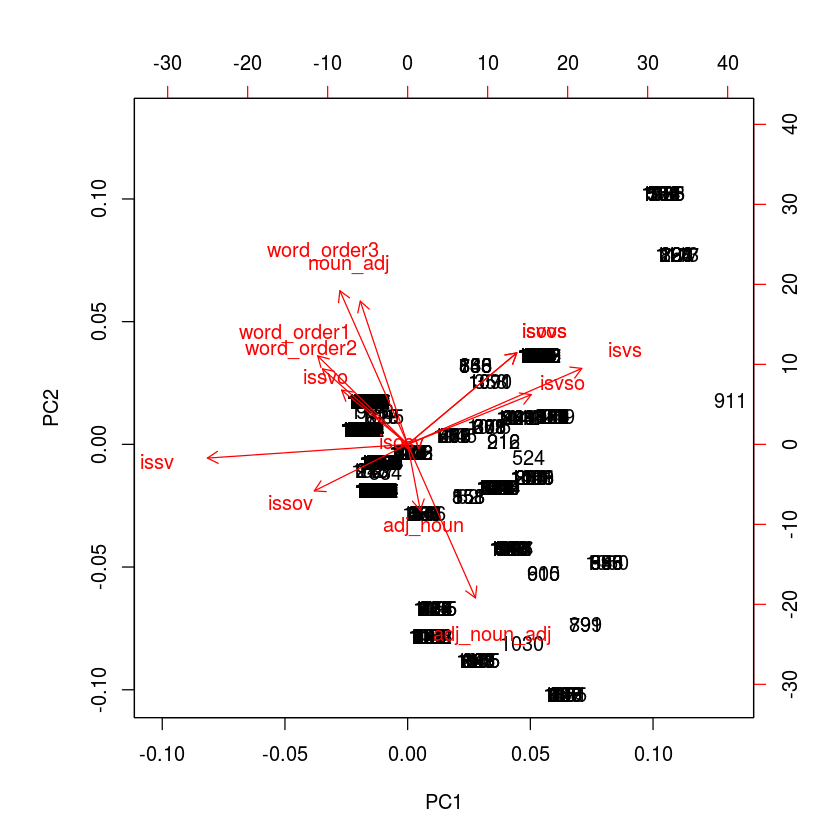

In [3]:
library(ggbiplot)
biplot(pca)

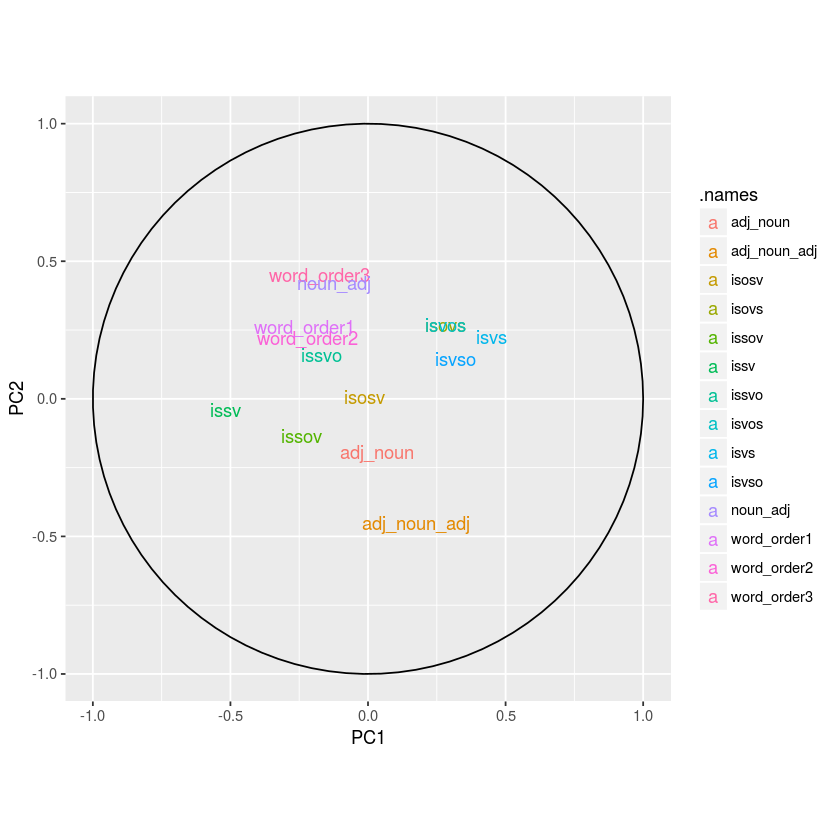

In [4]:
require(ggplot2)
theta <- seq(0,2*pi,length.out = 100)
circle <- data.frame(x = cos(theta), y = sin(theta))
p <- ggplot(circle,aes(x,y)) + geom_path()
loadings <- data.frame(pca$rotation, .names = row.names(pca$rotation))
p + geom_text(data=loadings, mapping=aes(x = PC1, y = PC2, label = .names, colour = .names)) + coord_fixed(ratio=1) +
labs(x = "PC1", y = "PC2")

In [7]:
library(ca)
mca = mjca(dat, lambda = "indicator", nd = 5)

# eigenvalues
mca$sv^2

[1] 2.210254e-01 1.711645e-01 1.499924e-01 1.287851e-01 1.164739e-01
 [6] 9.209829e-02 7.174631e-02 3.423635e-02 1.314036e-02 6.885312e-04
[11] 6.487525e-04 1.737014e-17 1.371544e-17 9.692859e-18

In [19]:
summary(mca)


Principal inertias (eigenvalues):

 dim    value      %   cum%   scree plot               
 1      0.221025  22.1  22.1  ******                   
 2      0.171165  17.1  39.2  ****                     
 3      0.149992  15.0  54.2  ****                     
 4      0.128785  12.9  67.1  ***                      
 5      0.116474  11.6  78.7  ***                      
 6      0.092098   9.2  88.0  **                       
 7      0.071746   7.2  95.1  **                       
 8      0.034236   3.4  98.6  *                        
 9      0.013140   1.3  99.9                           
 10     0.000689   0.1  99.9                           
 11     0.000649   0.1 100.0                           
 12     00000000   0.0 100.0                           
 13     00000000   0.0 100.0                           
 14     00000000   0.0 100.0                           
        -------- -----                                 
 Total: 1.000000 100.0                                 


Columns:
 